In [1]:
#from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("GOOGL_data.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


In [3]:
df = df.drop(['date','Name'], axis = 1)
df.head()

,open,high,low,close,volume
0,390.4551,393.7283,390.1698,393.0777,6031199
1,389.5892,391.8915,387.2619,391.6012,4330781
2,391.2659,394.3440,390.0747,390.7403,3714176
3,390.4551,393.0677,390.3750,391.8214,2393946
4,390.2549,394.7644,389.2739,394.3039,3466971


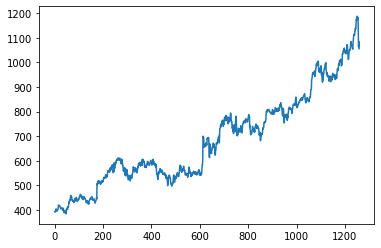

In [4]:
plt.plot(df.close)

In [5]:
ma100 = df.close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1254    1043.4596
1255    1045.2187
1256    1046.3761
1257    1047.7160
1258    1048.8688
Name: close, Length: 1259, dtype: float64

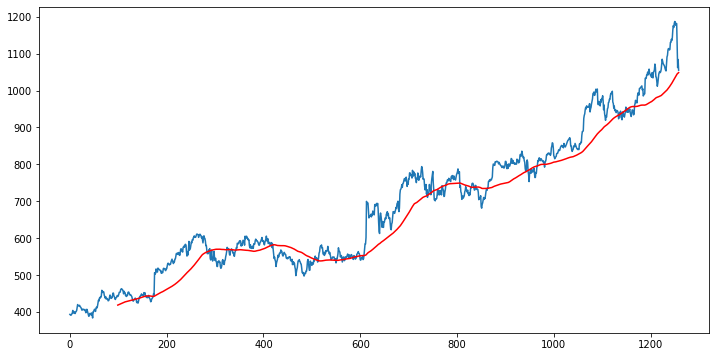

In [6]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')

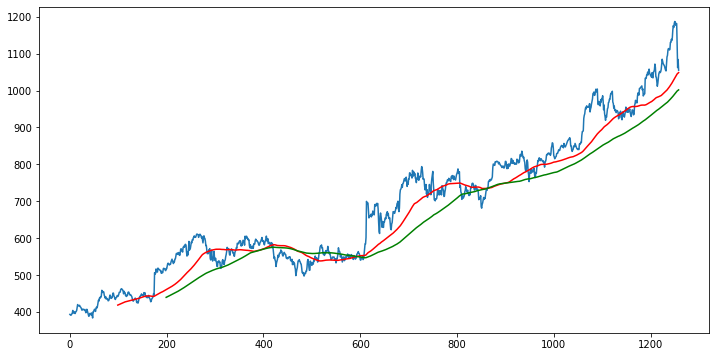

In [7]:
ma200 = df.close.rolling(200).mean()
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [8]:
df.shape

(1259, 5)

In [9]:
# Splitting data into training and testing

data_training = pd.DataFrame(df['close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['close'][int(len(df)*0.70): int(len(df))])
                                            
print(data_training.shape)
print(data_testing.shape)

(881, 1)
(378, 1)


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0229885 ],
       [0.01950282],
       [0.01747043],
       [0.02002266],
       [0.02588328],
       [0.03187375],
       [0.04836847],
       [0.03136571],
       [0.03499327],
       [0.03993225],
       [0.02936897],
       [0.02861281],
       [0.04001487],
       [0.04169267],
       [0.04758871],
       [0.06568333],
       [0.085888  ],
       [0.07735239],
       [0.07878916],
       [0.07751788],
       [0.08141694],
       [0.07289785],
       [0.07018036],
       [0.06572582],
       [0.05717368],
       [0.04947921],
       [0.05365023],
       [0.05765339],
       [0.05357917],
       [0.05245686],
       [0.05166505],
       [0.05494983],
       [0.04341769],
       [0.03340754],
       [0.04168087],
       [0.05568238],
       [0.04760287],
       [0.03444959],
       [0.02024717],
       [0.01055832],
       [0.01386671],
       [0.02867183],
       [0.02891995],
       [0.02851814],
       [0.01892396],
       [0.03244104],
       [0.01966831],
       [0.   

In [12]:
x_train = []
y_train = []

for i in range(30, data_training_array.shape[0]):
    x_train.append(data_training_array[i-30: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train.shape

(851, 30, 1)

In [14]:
#Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [15]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 60)            26640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 80)            45120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 80)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)              

In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
851/851 [==============================] - 7s 9ms/step - loss: 0.1068
Epoch 2/50
851/851 [==============================] - 6s 7ms/step - loss: 0.0229
Epoch 3/50
851/851 [==============================] - 7s 8ms/step - loss: 0.0151
Epoch 4/50
851/851 [==============================] - 7s 8ms/step - loss: 0.0123
Epoch 5/50
851/851 [==============================] - 7s 8ms/step - loss: 0.0128
Epoch 6/50
851/851 [==============================] - 7s 8ms/step - loss: 0.0107
Epoch 7/50
851/851 [==============================] - 7s 8ms/step - loss: 0.0114
Epoch 8/50
851/851 [==============================] - 7s 8ms/step - loss: 0.0121
Epoch 9/50
851/851 [==============================] - 7s 8ms/step - loss: 0.0115
Epoch 10/50
851/851 [==============================] - 7s 8ms/step - loss: 0.0109
Epoch 11/50
851/851 [==============================] - 7s 8ms/step - loss: 0.0107
Epoch 12/50
851/851 [==============================] - 7s 8ms/step - loss: 0.0101
Epoch 13/50
851/851 [====

In [18]:
model.save('model.h5')

In [19]:
past_30_days = data_training.tail(30)

In [20]:
final_df = past_30_days.append(data_testing, ignore_index=True)

In [21]:
final_df.head()

,close
0,681.14
1,691.26
2,695.19
3,703.53
4,710.25


In [22]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01998341],
       [0.02774377],
       [0.04421231],
       [0.05748193],
       [0.04689783],
       [0.05495439],
       [0.05157774],
       [0.07235101],
       [0.09095217],
       [0.10143754],
       [0.09545437],
       [0.10793413],
       [0.10759844],
       [0.14229296],
       [0.14270763],
       [0.14995458],
       [0.14468228],
       [0.1542988 ],
       [0.15082343],
       [0.15108013],
       [0.1596106 ],
       [0.16725248],
       [0.21760594],
       [0.23656254],
       [0.23494333],
       [0.23257375],
       [0.22927609],
       [0.24839066],
       [0.24503377],
       [0.24947672],
       [0.25147111],
       [0.25089846],
       [0.24862762],
       [0.24647526],
       [0.2370562 ],
       [0.24540895],
       [0.24013665],
       [0.23401524],
       [0.2286837 ],
       [0.22797283],
       [0.22206864],
       [0.21752695],
       [0.22131827],
       [0.22645235],
       [0.21875123],
       [0.21466372],
       [0.217

In [26]:
x_test = []
y_test = []

for i in range(30, input_data.shape[0]):
    x_test.append(input_data[i-30: i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [27]:
print(x_test.shape)
print(y_test.shape)

(378, 30, 1)
(378,)


In [28]:
#Prediction

y_predicted = model.predict(x_test)

In [29]:
y_predicted.shape

(378, 1)

In [30]:
y_test

array([0.24947672, 0.25147111, 0.25089846, 0.24862762, 0.24647526,
       0.2370562 , 0.24540895, 0.24013665, 0.23401524, 0.2286837 ,
       0.22797283, 0.22206864, 0.21752695, 0.22131827, 0.22645235,
       0.21875123, 0.21466372, 0.21772442, 0.22852573, 0.25054303,
       0.25048379, 0.24031436, 0.21195845, 0.23237629, 0.21243237,
       0.21586825, 0.23713518, 0.23069784, 0.22560325, 0.23427195,
       0.24463884, 0.26620197, 0.26424707, 0.23993918, 0.25589432,
       0.2545713 , 0.23991943, 0.24272343, 0.23545674, 0.24021563,
       0.23713518, 0.24078828, 0.23610837, 0.2626871 , 0.25360373,
       0.25794795, 0.24276292, 0.24378974, 0.24821295, 0.2771415 ,
       0.28819952, 0.27741795, 0.28221634, 0.3052802 , 0.2910825 ,
       0.27834604, 0.26896647, 0.27333044, 0.25425536, 0.24552743,
       0.21183997, 0.19953793, 0.19738557, 0.2387149 , 0.25836262,
       0.24574464, 0.19578611, 0.17892263, 0.14233245, 0.18565617,
       0.19517397, 0.20737728, 0.18725564, 0.20469176, 0.20508

In [31]:
y_predicted

array([[0.13837177],
       [0.14442155],
       [0.15135193],
       [0.15970837],
       [0.16958243],
       [0.18046875],
       [0.19176304],
       [0.20261905],
       [0.21257961],
       [0.22127186],
       [0.22833654],
       [0.23382597],
       [0.23777595],
       [0.24040225],
       [0.24186552],
       [0.24231023],
       [0.24193649],
       [0.24087027],
       [0.23927188],
       [0.23729825],
       [0.23537299],
       [0.23383869],
       [0.23284099],
       [0.23223454],
       [0.23162515],
       [0.23098913],
       [0.23029155],
       [0.22956418],
       [0.22887701],
       [0.22806413],
       [0.2273952 ],
       [0.22692004],
       [0.22699514],
       [0.22792576],
       [0.22967243],
       [0.23219338],
       [0.23541683],
       [0.23891844],
       [0.24254876],
       [0.2459901 ],
       [0.24904716],
       [0.25156337],
       [0.25356027],
       [0.25501263],
       [0.2561321 ],
       [0.25714278],
       [0.2583227 ],
       [0.259

In [32]:
scaler.scale_

array([0.00197465])

In [33]:
scale_factor = 1/0.00197465

In [34]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

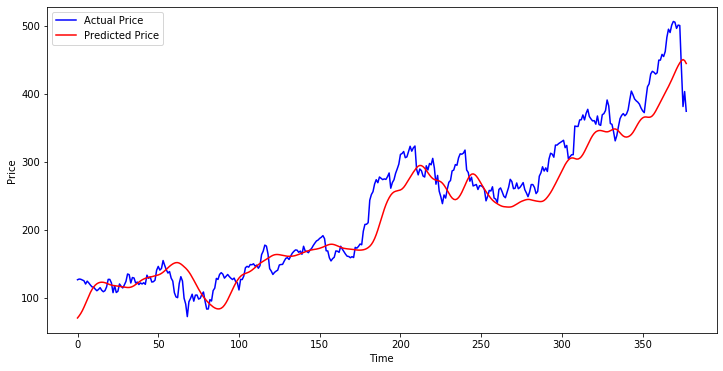

In [37]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Actual Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()